In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Crear el dataset

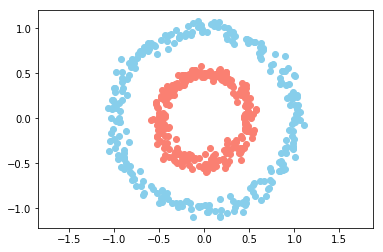

In [52]:
n = 500
p = 2

x, y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)

y = y[:, np.newaxis]

plt.scatter(x[y[:,0] == 0, 0], x[y[:,0] == 0, 1], c="skyblue")
plt.scatter(x[y[:,0] == 1, 0], x[y[:,0] == 1, 1], c="salmon")
plt.axis("equal")

plt.show()

(500,)

# Clase de la capa de la red

In [0]:
class neural_layer():
  
  def __init__(self, n_conn, n_neur, act_f):
  
    self.act_f = act_f
    
    self.b = np.random.rand(1, n_neur) * 2 -1
    self.w = np.random.rand(n_conn, n_neur) * 2 -1

# Funcion de activación

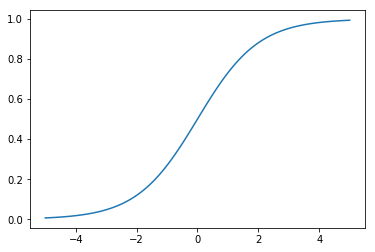

In [36]:
#Funcion de activacion
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 -x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)

# plt.plot(_x, relu(_x))
plt.plot(_x, sigm[0](_x))

In [0]:
# l0 = neural_layer(p, 4, sigm)
# l1 = neural_layer(4, 8, sigm)
# ...

def create_nn(topology, act_f):
  
  nn = []
  
  for l, layer in enumerate(topology[:-1]):
    
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
  return nn

In [0]:
topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigm)

In [0]:
# Coste
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

# Entrenamiento
def train(neural_net, x, y, l2_cost, lr = 0.5, train = True):
  
  out = [(None, x)]
  
  # Forward pass
  
  for l, layer in enumerate(neural_net):
    
    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    
    out.append((z, a))
    
  print(l2_cost[0](out[-1][1], y))
  
  if train:
    
    # Backward pass
    
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      
      if l == len(neural_net) - 1:
        # Calcular delta ultima capa.
        deltas.insert(0, l2_cost[1](a, y) * neural_net[l].act_f[1](a))
      else:
        # Calcular delta respecto a capa previa.
        deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))
        
      _w = neural_net[l].w
      
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0, keepdims = True) * lr
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr 

  return out[-1][1]

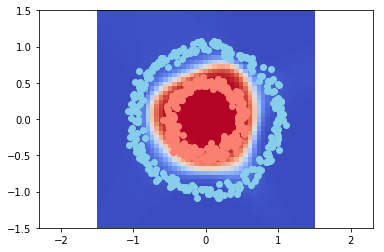

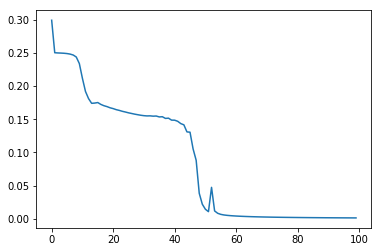

0.0011638963976430602
0.0011630490592484332
0.0011622029412579533
0.001161358041041666
0.0011605143559771643
0.0011596718834495574
0.0011588306208514553
0.0011579905655829297
0.0011571517150514932
0.0011563140666720714
0.0011554776178669766
0.0011546423660658838
0.0011538083087057976
0.0011529754432310357
0.0011521437670931945
0.0011513132777511267
0.0011504839726709153
0.0011496558493258484
0.0011488289051963954
0.0011480031377701727
0.0011471785445419285
0.0011463551230135138
0.0011455328706938567
0.0011447117850989388


In [70]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, x, y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(x[y[:,0] == 0, 0], x[y[:,0] == 0, 1], c="skyblue")
    plt.scatter(x[y[:,0] == 1, 0], x[y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  